In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [20]:
base_dir = '/mnt/d/School/ITS/BANGKIT ACADEMY/Capstone Project/Rice Leaf Disease Images'

In [27]:
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4747 images belonging to 4 classes.
Found 1185 images belonging to 4 classes.


In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [33]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50


/root/anaconda3/envs/py312/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 134s 752ms/step - accuracy: 0.7202 - loss: 13.6387 - val_accuracy: 0.2751 - val_loss: 7.4326 - learning_rate: 0.0010
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 79s 512ms/step - accuracy: 0.7949 - loss: 3.7656 - val_accuracy: 0.3848 - val_loss: 4.9203 - learning_rate: 0.0010
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 495ms/step - accuracy: 0.8291 - loss: 2.7648 - val_accuracy: 0.5283 - val_loss: 3.9432 - learning_rate: 0.0010
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 496ms/step - accuracy: 0.8354 - loss: 2.4702 - val_accuracy: 0.6329 - val_loss: 3.2212 - learning_rate: 0.0010
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 73s 471ms/step - accuracy: 0.8513 - loss: 2.2635 - val_accuracy: 0.4954 - val_loss: 3.3345 - learning_rate: 0.0010
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 71s 459ms/step - accuracy: 0.8488 - loss: 1.9691 - val_accuracy: 0.4937 - val_loss: 3.8444 - learning_rate: 0.0010
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 72s 464ms/step - accuracy: 0.8602 - los

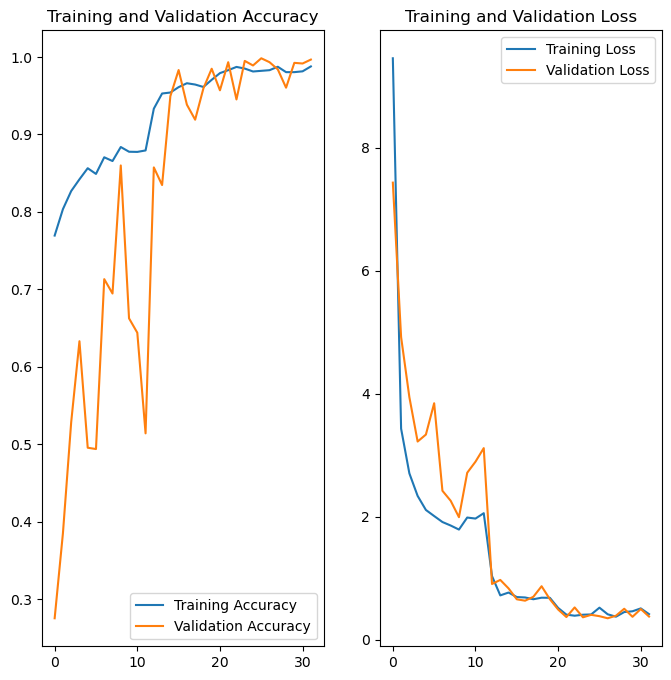

In [34]:
# Evaluate
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [35]:
model.save('rice_leaf_disease_model.h5')

In [37]:
model.save('rice_leaf_disease_model.keras')